In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
path = r'D:/Study/Python/openCV/Experiments/DATA/'
img = cv2.imread(path+'lena.tif',0)

In [16]:
def show_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,'gray')

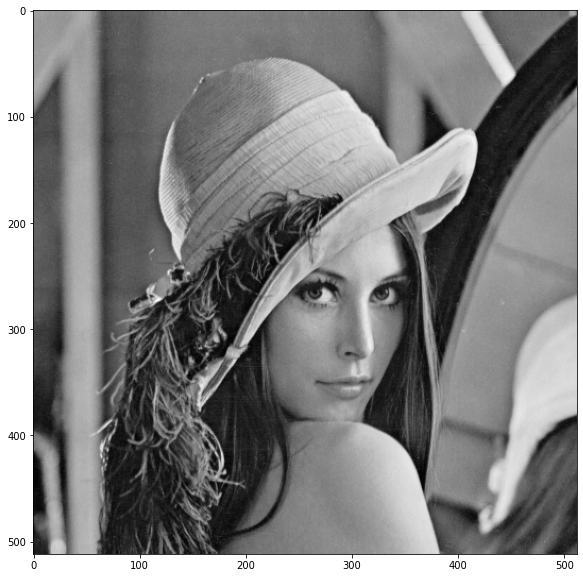

In [17]:
img.shape
show_img(img)

In [22]:
# Setting new resolution
new_row=256
new_coloumn=200
enlarged_img=np.zeros((new_row,new_coloumn),'uint8')
enlarged_img.shape

row_scale=float(img.shape[0]/enlarged_img.shape[0])
col_scale=float(img.shape[1]/enlarged_img.shape[1])

row_scale,col_scale

(2.0, 2.56)

In [23]:
def bilinear_pixel_value(img,posy,posx):
    out=[]

    Xi=int(posx)
    Yi=int(posy)
    Xf=posx-Xi
    Yf=posy-Yi
    Xi_lim=min(Xi+1,img.shape[1]-1)
    Yi_lim=min(Yi+1,img.shape[0]-1)

    bl=img[Yi,Xi]
    br=img[Yi,Xi_lim]
    tl=img[Yi_lim,Xi]
    tr=img[Yi_lim,Xi_lim]

    b= br * Yf + bl*(1.0-Yf)
    t= tr * Yf + tl*(1.0-Yf)
    
    g=Xf*t+(1.0-Xf)*b

    return g

In [24]:
for r in range(new_row):
    for c in range(new_coloumn):
        orig_row = r * row_scale
        orig_col = c * col_scale

        enlarged_img[r,c] = bilinear_pixel_value(img,orig_row,orig_col)

True

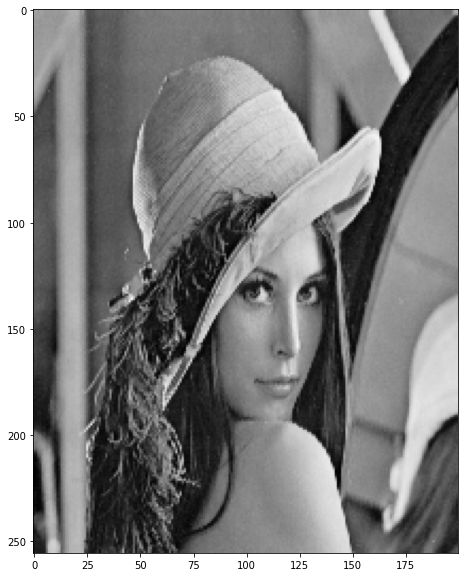

In [25]:
show_img(enlarged_img)
cv2.imwrite("Enlarged.png",enlarged_img)